## **Context**

We are given a small medical dataset with some categorical and numerical variables to determinate the possible charges a beneficiary could have depending his/her condition.
We need to create a machine learning model using linear regression techniques to predict the numerical value (I will upload another program soon with random forest regression to we can see the difference)

**dataset link:** https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

## **Data Description**

- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index.
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

### Importing general libraries

In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**IMPORTING DATASET**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**CHECKING FOR COLUMNS TYPES AND MISSING VALUES**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**
- There are 1,338 observations and 7 different features (columns)
- There are not missing values in our dataset
-  Each of the columns have it's corresponding type

As there are not missing values and the columns have the correct type, we can proceed to EDA and visualization to optain other insights of our data.

### **EDA and VISUALIZATION**

In [5]:
# Inferential statistic based on numeric columns values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations:**
- The average `age` is 39 years old, and the oldest client registered is 64 years old.
- Most of the clients only have one ``child or dependent`` and the case with more children/dependent is 5.
- The average ``BMI`` is above the normal average `18.5 - 24.9`. 

In [6]:
# percentage of male and female clients
df['sex'].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

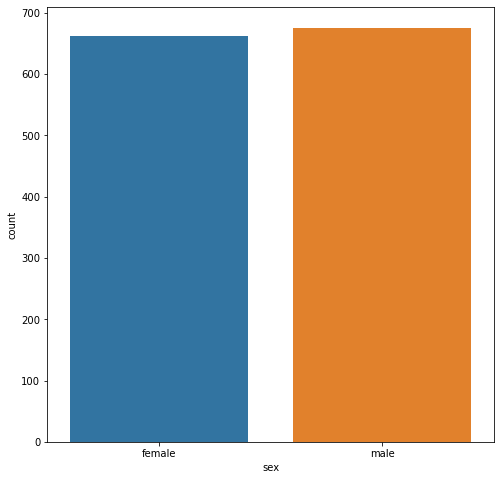

In [7]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'sex', data = df)
plt.show()

**Observations:**
- The distribution of both female and male clients is almost symetric with a little more males than females.

In [8]:
# Smoker percentage between the clients
df['smoker'].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

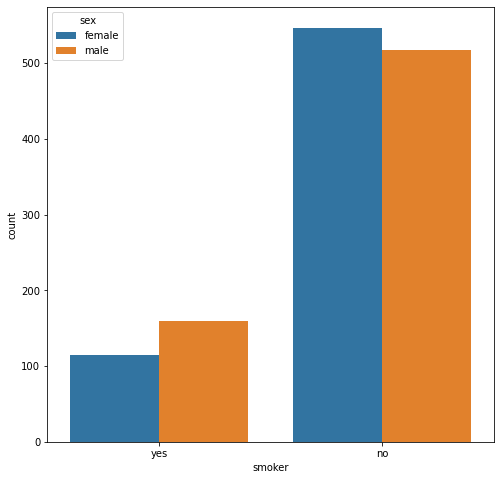

In [9]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'smoker', data = df, hue = 'sex')
plt.show()

**Observations:**
- Most of the clients are **non-smokers** with a greater number of female fitting into this category.
- The clients that do smoke are mostly men.

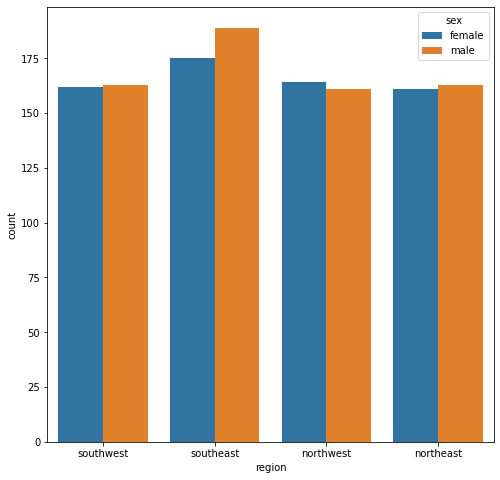

In [10]:
# number of clients per region
plt.figure(figsize = (8,8))
sns.countplot(x = 'region', data = df, hue = 'sex')
plt.show()

**Observations:**
- The distribution of the clients by `region` is good, as we can notice on the graph above.
- The region with more clients is the ``southeast`` region with more male than female.
- The only ``region`` where female are predominant is the ``northwest`` region.

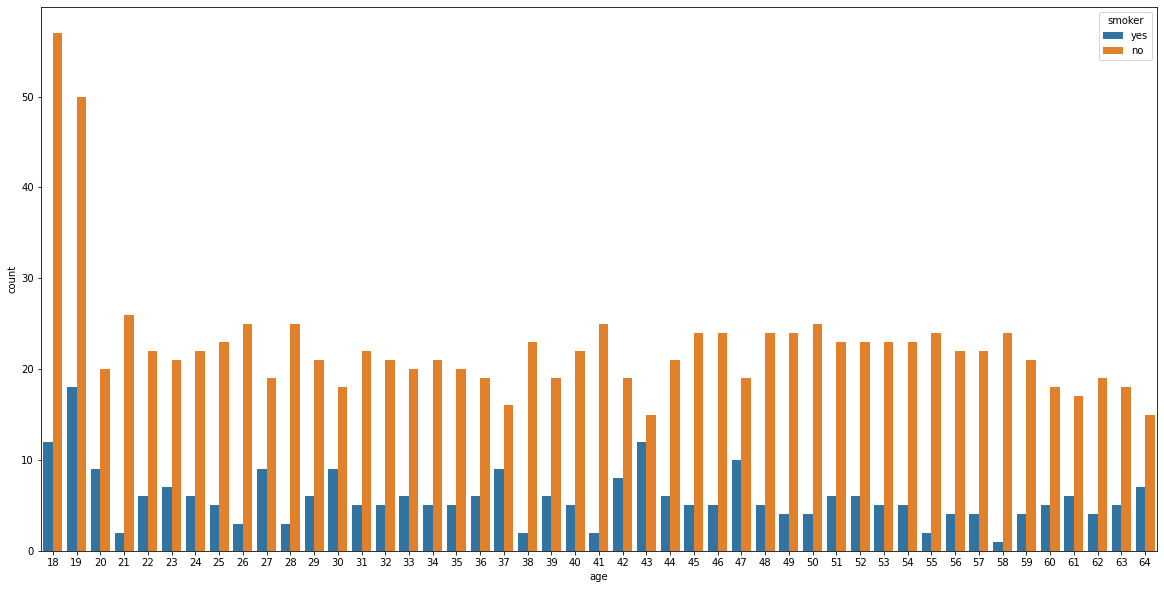

In [11]:
# smokers depending on the age of the client
plt.figure(figsize = (20,10))
sns.countplot(x = 'age', data = df, hue = 'smoker')
plt.show()

**Observations:**
- There is not a define pattern for smoker and age but we can see that the younger people has a higher number of no smoker but are also the highest number of smokers.

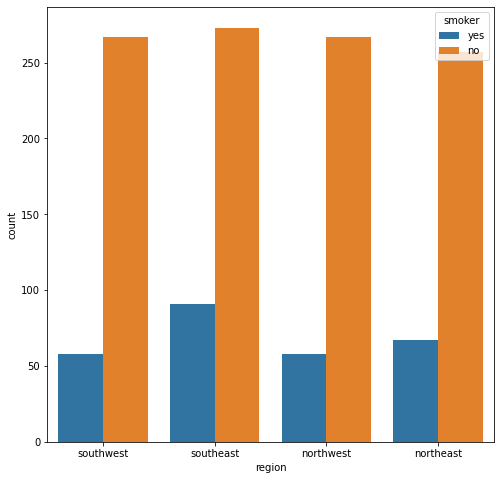

In [12]:
# smokers by region
plt.figure(figsize = (8,8))
sns.countplot(x = 'region', data = df, hue = 'smoker')
plt.show()

**Observations:**
- The region with the highest number of smokers is the ``southest`` region which is also the region with the greater concentration of clients.

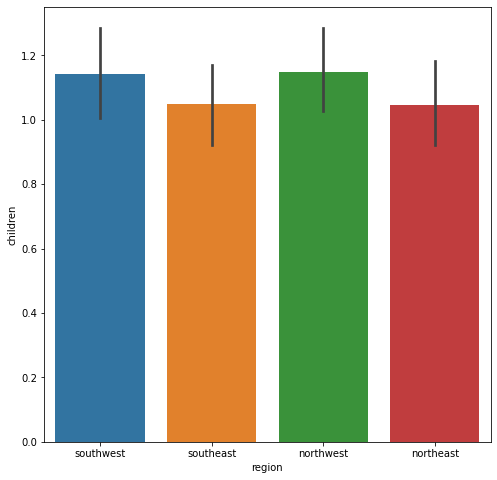

In [13]:
# number of children or dependents by region
plt.figure(figsize = (8,8))
sns.barplot(x = 'region', y = 'children', data = df)
plt.show()

**Observations:**
- The ``regions`` with the greaters number of children are the ``southwest`` and ``northwest`` regions.

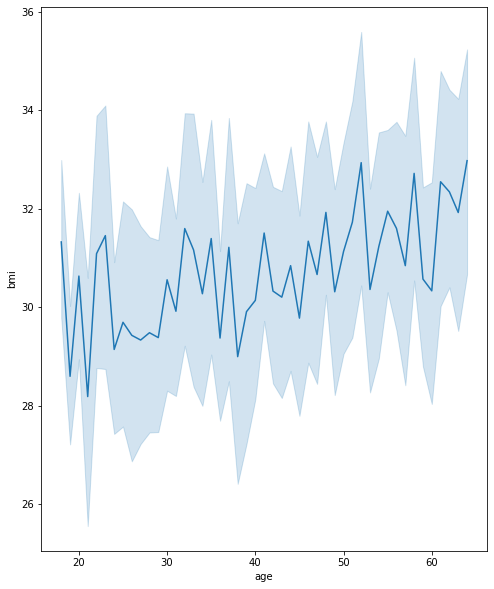

In [14]:
# relation of the age with teh bmi of a person
plt.figure(figsize = (8,10))
sns.lineplot(x = 'age', y = 'bmi', data = df)
plt.show()

**Observations:**
- The relation between the age and the bmi is not constant, but we can notice a trend of the ``bmi`` increase with the increase of the ``age``.

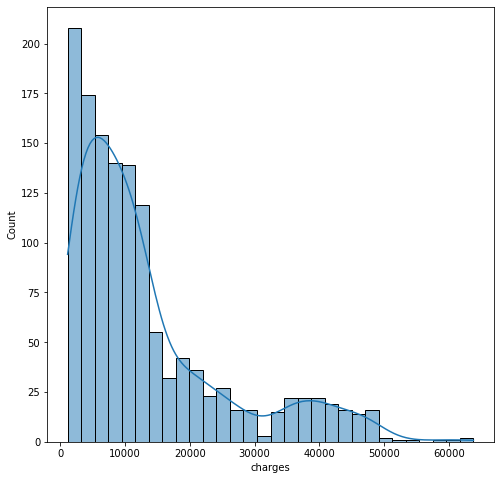

In [15]:
# checking the distribution of the target variable
plt.figure(figsize = (8,8))
sns.histplot(data = df, x = 'charges', kde = True)
plt.show()

**Observations:**
- The target variable is righ-skewed, which means most of the values are low.

**Observations:**
- After we applied log-transformation we can see that the dependant variable/target variable now resemble more a normal distribution plot.

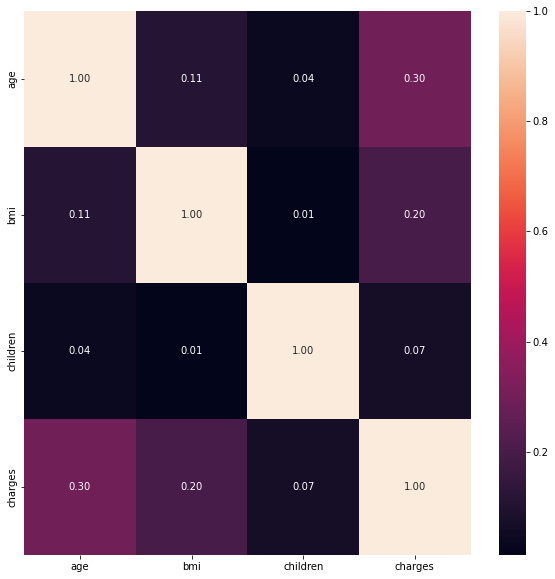

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f' )
plt.show()

**Observations**
- Between the numerical variables there are not high correlation with the target variable ``charges``
- The ``age`` have a 30% positive correlation with the ``charges``.
- The ``bmi`` have a 20% positive correlation with the ``charges``.

## **Preparing data for modelig**

**IMPORTING LIBRARIES FOR MODELING**

In [17]:
# library for linear visualization
from statsmodels.graphics.gofplots import ProbPlot

# importing decision tree and random forest libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# importing library for splitting the data
from sklearn.model_selection import train_test_split

# importing library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

In [18]:
# independant variable
X = df.drop(columns = 'charges')

# dependant variable/target
Y = df['charges']

In [19]:
# creating dummy variables from the train_feature
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**SPLITTING THE DATA BETWEEN TRIAN AND TEST DATA**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state = 1)

## BUILDING THE MODEL

### **MODEL 1 DECISION TREE**

In [21]:
regressor  = DecisionTreeRegressor()

# training our model with the train data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

**PREDICTING THE TEST DATA**

In [22]:
# predicting test data
pred1 = regressor.predict(X_test)

In [23]:
# creating data frame to compare predicted and actual values
df_first_model = pd.DataFrame({'Actual value': y_test, 'predicted value': pred1})

In [24]:
df_first_model

,Actual value,predicted value
559,1646.42970,1263.24900
1087,11353.22760,11842.62375
1020,8798.59300,8457.81800
460,10381.47870,10977.20630
802,2103.08000,1964.78000
...,...,...
682,40103.89000,40273.64550
629,42983.45850,48885.13561
893,44202.65360,45702.02235
807,2136.88225,2404.73380


**CALCULATING THE PRECISION OF THE MODEL**

In [25]:
regressor.score(X_test, y_test)

0.7642329112325484

**Observations:**
- We have a 76% accuracy with our decision tree model

## **Hyperparameter tuning**

In [35]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,9],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40] }

In [36]:
# importing the gridsearch module
from sklearn.model_selection import GridSearchCV

tuning_regressor = GridSearchCV(regressor,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
# training the model
tuning_regressor.fit(X_train, y_train)

In [38]:
# printing the best parameters for our model
tuning_regressor.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

**BUILDING DECISION TREE WITH BEST PARAMETERS**

In [39]:
# creating decision tree with the best parameters
tuned_hyper_regressor = DecisionTreeRegressor(max_depth=5,max_features='auto',
                                              max_leaf_nodes = 20,min_samples_leaf = 2,
                                         min_weight_fraction_leaf = 0.1,splitter='best')

In [40]:
# training the new model
tuned_hyper_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1)

In [41]:
# predicting the test values
tuned_predict = tuned_hyper_regressor.predict(X_test)

**CALCULATING THE PRECISION OF THE MODEL**

In [42]:
# printing the score of the test data to see how accurate our model is
tuned_hyper_regressor.score(X_test, y_test)

0.8494124065246363

**OBSERVATIONS:**
- the model precision after we tuned the hyperparameters increased from 76% to 85% accuracy almost 10% improvement

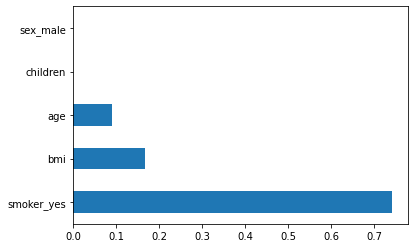

In [48]:
feat_importances = pd.Series(tuned_hyper_regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**Observations:**
- The `smoking` condition of the customer is the feature that impacts the most the `charges`.
- Followed by the BMI and the age of the customer

### BUILDING MODEL 2

In [43]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# fitting the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [44]:
# predicting the test data
pred2 = rf_regressor.predict(X_test)

In [45]:
# creating dataframe to compare both the actual values and the predicted one.
df_second_model = pd.DataFrame({'Actual values': y_test, 'Predicted values': pred2})

In [46]:
df_second_model.head()

,Actual values,Predicted values
559,1646.4297,1567.180331
1087,11353.2276,12563.575434
1020,8798.5930,8913.555257
460,10381.4787,11259.691310
802,2103.0800,2089.665900


**TESTING THE ACCURACY OF THE SECOND MODEL**

In [47]:
rf_regressor.score(X_test, y_test)

0.8480159884120858

**Observations:**
- The accuracy of the second model is ~85% which is almost hte same as the first model after tuning the hyperparameters.

**CURRENT PARAMETERS TO MODIFY**

In [50]:
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

### **RANDOM FOREST HYPERPARAMETERS TUNING**

In [51]:
parameters = {"bootstrap":[True, False],
            "max_depth" : [10,20,30,40],
           "min_samples_leaf":[1,2,3,4],
           "min_samples_split":[2,5,7,10],
           "max_features":["auto","log2","sqrt"],
           "n_estimators":[50,100,150,200] }

In [52]:
rf_regression_grid = GridSearchCV(rf_regressor, param_grid = parameters, cv = 3, n_jobs = -1, verbose = 3)

In [ ]:
# training the model
rf_regression_grid.fit(X_train, y_train)

In [54]:
# best hyperparameters
rf_regression_grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [55]:
# creating random forest with the best parameters
rf_regressor_tuned = RandomForestRegressor(bootstrap = True,
                                          max_depth = 20,
                                          max_features = 'auto',
                                          min_samples_leaf = 4,
                                          min_samples_split = 10,
                                          n_estimators = 100)

In [56]:
# fitting the tunned model
rf_regressor_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [57]:
# creating variable with the prediction of the test data with rf tunned model
rf_tuned_predict = rf_regressor_tuned.predict(X_test)

In [58]:
# measuring the accuracy of the tunned random forest model
rf_regressor_tuned.score(X_test, y_test)

0.8768134873244532

**OBSERVATIONS:**
- The result of the model are the best so far with a 88% accuracy agains the 85% accuracy of the tunned decision tree model.

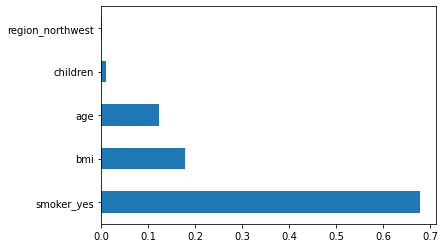

In [59]:
feat_importances = pd.Series(rf_regressor_tuned.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**Observations:**
- Just like the other models the most relevant feature when predicting the charges is whether the customer is a `smoker` or not.
-  Followed by `BMI`, `Age` and a new features of importance that was not present in the other models which is if the customers have `children or dependants`.

## **Conclusion**
- The after creating 2 different models and tuned their parameters, the random forest with the tunned parameters return the best result out of all, making it the best model with an overall accuracy of 88% and the most important parameters that influenced the result were the `smoker` status, the `BMI`, `Age` and the `children or dependants`.